In [1]:
import numpy as np

In [2]:
def process_line(line, neighbors, last):
    l = len(line)-2
    #connecting the first three char node with the last three char from line before
    sstr = line[0:3]
    if sstr not in neighbors:
        neighbors[sstr] = {}
    if len(sstr)==3 and len(last)==3:
        neighbors[sstr][last] = 1
    #iterate over line
    for k in range(l):
        #getting current node
        sstr = line[k:(k+3)]
        if len(sstr)!=3:
            continue
        #initializing the dict corresponding to the current node
        #using dict we wont same the same connections multiple times
        if sstr not in neighbors:
                neighbors[sstr] = {}
        if k>2:
            # connecting the three before char node with the current node
            sbefore = line[(k-3):k]
            neighbors[sstr][sbefore] = 1
        if k<(l-4):
            # connecting the three next char node with current node
            snext = line[(k+3):(k+6)]
            neighbors[sstr][snext]  = 1
    # returning the last three char node
    return line[(l-2):(l+1)]

In [3]:
# reading the file
f=open("dat.txt", "r")

In [4]:
#initializing the neighborhood matrix
neighbors={}

In [5]:
last=""
for line in f:
    #iterating over line, removing end of line char
    last=process_line(line.replace("\n","").replace("\\",""), neighbors, last)

In [6]:
# getting the degrees of every nodes
# the degree is simply the number of connected nodes to a node
node_deg = []
for node in neighbors:
    node_deg.append(len(neighbors[node]))

In [7]:
# sorting the degrees array, heapsort nlog(n) algorithm
node_deg = np.sort(np.array(node_deg), kind="heapsort")

In [8]:
def cch(x, arr):
    # finding the x value in the prices array
    # searchsorted use Binary search, log(n) algorihm
    idx = np.searchsorted(arr, int(np.ceil(x)))
    #if the array is sorted then cch is simply len-(idx+1)
    return len(arr)-idx-1

In [9]:
#initializating the x values, getting cch
x = [i for i in range(node_deg[-1])]
h = [cch(i, node_deg) for i in x]
# NORMALIZING to get CCDF
h=np.array(h)/max(h)

In [10]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

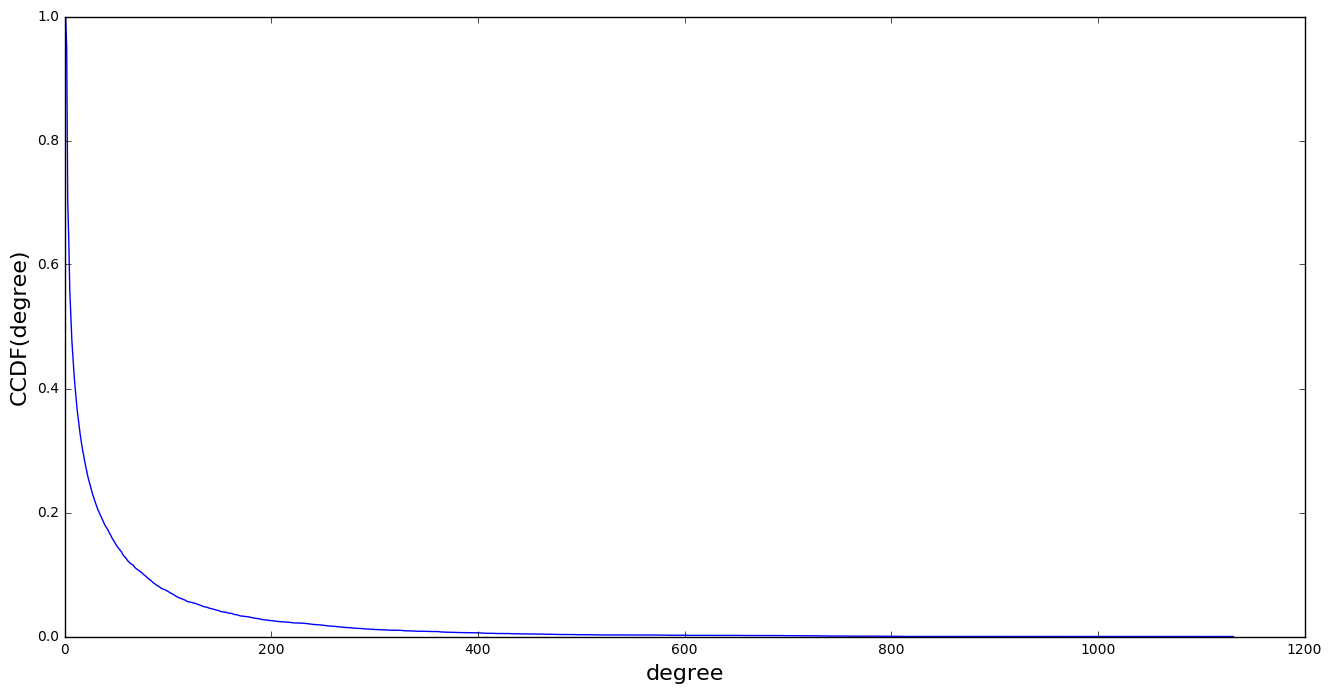

In [11]:
#plot
plt.figure(0, (16,8))
plt.xlabel("degree", fontsize=16)
plt.ylabel("CCDF(degree)", fontsize=16)
plt.plot(x, h)

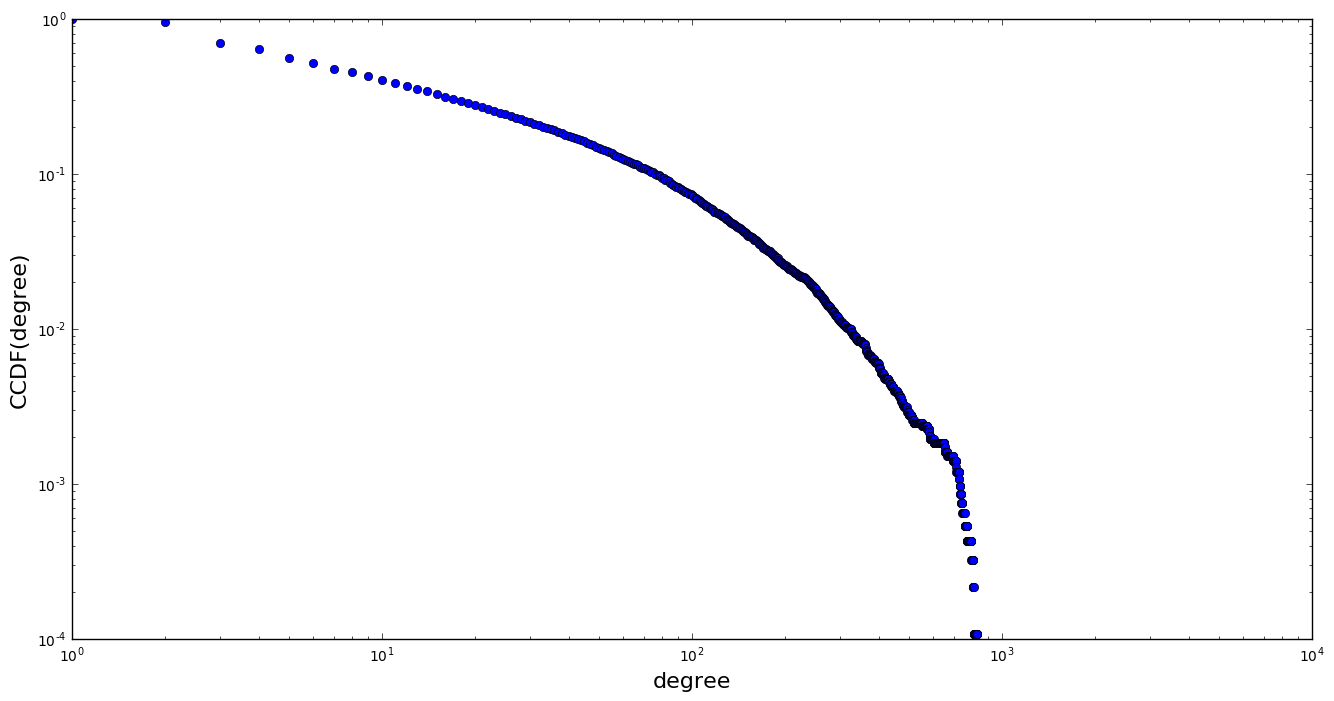

In [12]:
#log plot
plt.figure(0, (16,8))
plt.loglog()
plt.xlabel("degree", fontsize=16)
plt.ylabel("CCDF(degree)", fontsize=16)
plt.plot(x, h, 'o')